In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('/content/sample_data/Zomato data .csv')
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [3]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [4]:
Rating_column=df['rate']
Rating_column

,rate
0,4.1/5
1,4.1/5
2,3.8/5
3,3.7/5
4,3.8/5
...,...
143,3.3/5
144,3.3/5
145,4.0/5
146,3.0/5


In [17]:
#Step 3: Clean and Prepare the Data
# Convert Ratings: Since the rate column contains ratings with “/5,” split and convert it to a numeric format.
Rating_column=Rating_column.str.split('/').str[0]
Rating_column

,rate
0,4.1
1,4.1
2,3.8
3,3.7
4,3.8
...,...
143,3.3
144,3.3
145,4.0
146,3.0


In [18]:
#2.  Verify Data Types: Check the data types of all columns and the presence of null values.
null_counts = df.isnull().sum()
print(null_counts)

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64


In [19]:
#3.Conclusion: Confirm there are no null values in the dataset.
df.dropna(inplace=True)
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


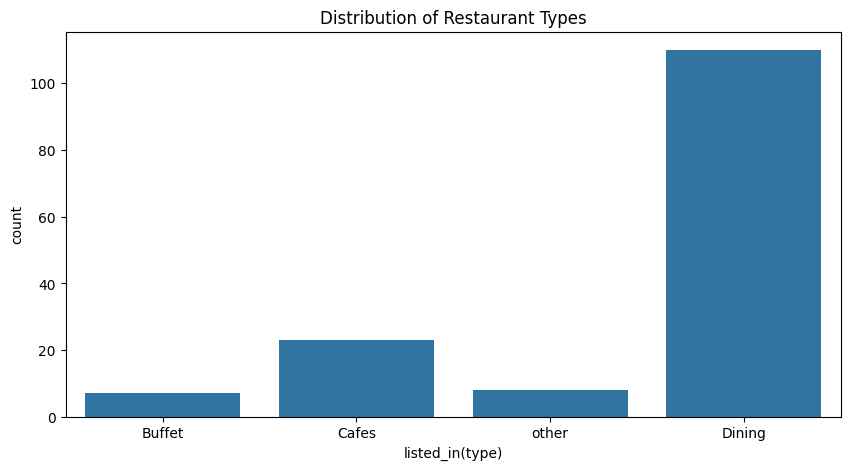

In [21]:
#Step 4: Data Analysis and Visualization
#Analysis 1: Types of Restaurants
#1.Use a count plot to show the distribution of restaurant types.
restaurant_types=df['listed_in(type)']
plt.figure(figsize=(10,5))
plt.title('Distribution of Restaurant Types')
sns.countplot(data=df,x=restaurant_types)
plt.show()

In [ ]:
#2. Conclusion: Note which type of restaurant is the most common.
#DINING seems to be preferred.

In [22]:
#Analysis 2: Votes by Restaurant Type

#1. Group the data by listed_in(type) and calculate the sum of votes.
votes_by_type=df.groupby('listed_in(type)')['votes'].sum()
votes_by_type


,votes
listed_in(type),
Buffet,3028
Cafes,6434
Dining,20363
other,9367


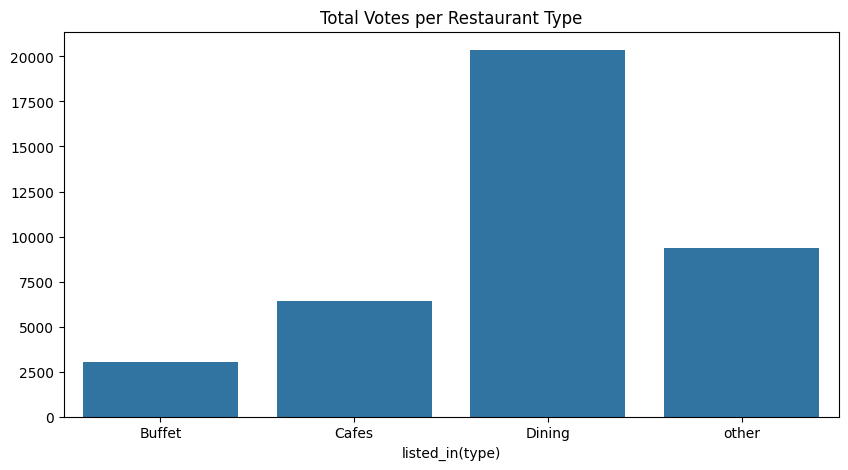

In [23]:
#2. Plot the result to show the total votes per restaurant type.
plt.figure(figsize=(10,5))
plt.title('Total Votes per Restaurant Type')
sns.barplot(x=votes_by_type.index,y=votes_by_type.values)
plt.show()

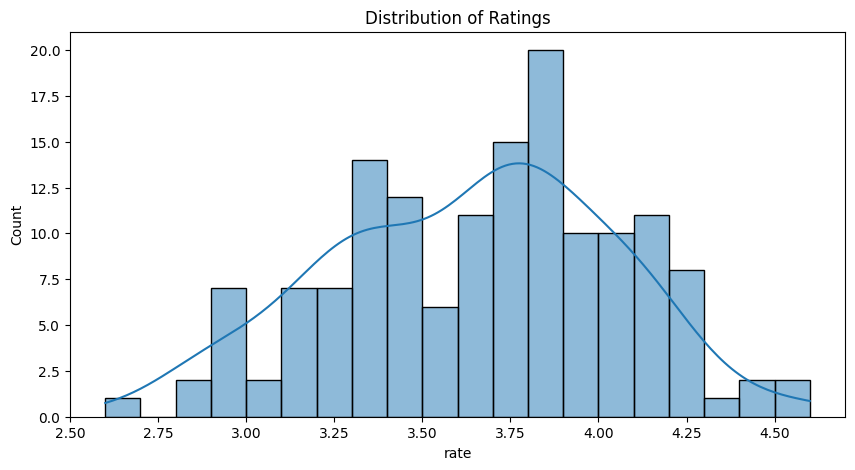

In [26]:
#Analysis 3: Ratings Distribution
#1. Plot a histogram of the rate column to show the distribution of ratings.
plt.figure(figsize=(10,5))
plt.title('Distribution of Ratings')
sns.histplot(data=df,x='rate',bins=20,kde=True)
plt.show()



In [ ]:
#2. Conclusion: Identify the rating range most restaurants fall into (typically 3.5 to 4).

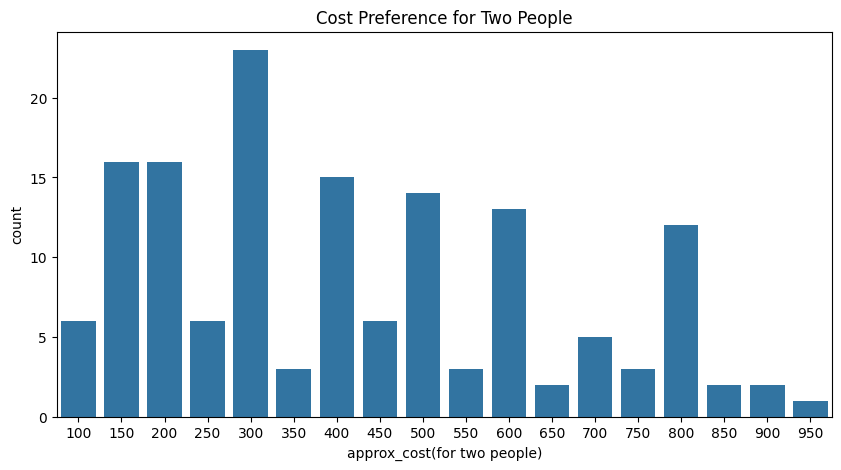

In [27]:
#Analysis 4: Restaurant Cost Preference for Couples

#1. Use a count plot to examine approx_cost(for two people).
cost_preference=df['approx_cost(for two people)']
plt.figure(figsize=(10,5))
plt.title('Cost Preference for Two People')
sns.countplot(data=df,x=cost_preference)
plt.show()

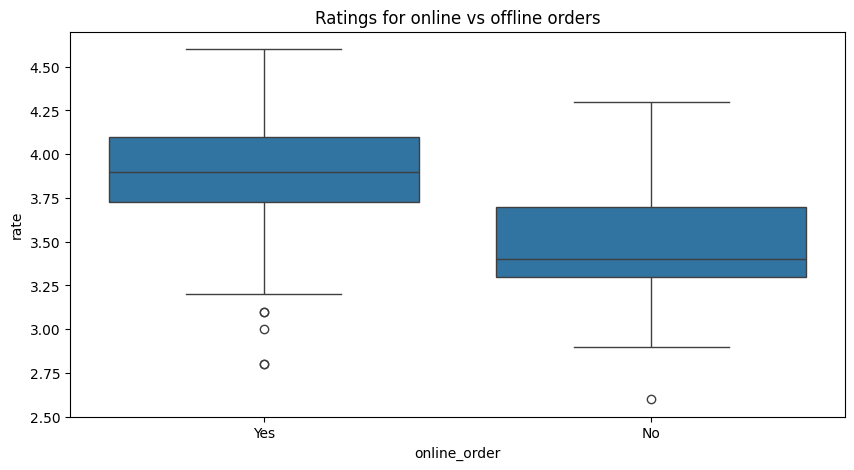

In [29]:
#Analysis 5: Online vs. Offline Ratings
#1. Create a box plot to compare ratings for online vs. offline orders.
rating_online_offline=df.groupby('online_order')['rate'].mean()
rating_online_offline
plt.figure(figsize=(10,5))
plt.title('Ratings for online vs offline orders')
sns.boxplot(data=df,x='online_order',y='rate')
plt.show()

In [ ]:
#2. Conclusion: online orders have higher ratings than offline ones.

In [32]:
#Analysis 6: Online Orders by Restaurant Type
#1. Create a pivot table to show the number of restaurants offering online vs. offline orders by type.
pivot_table=pd.pivot_table(df,values='name',index='listed_in(type)',columns='online_order',aggfunc='count',fill_value=0)
pivot_table


online_order,No,Yes
listed_in(type),,
Buffet,3,4
Cafes,8,15
Dining,77,33
other,2,6


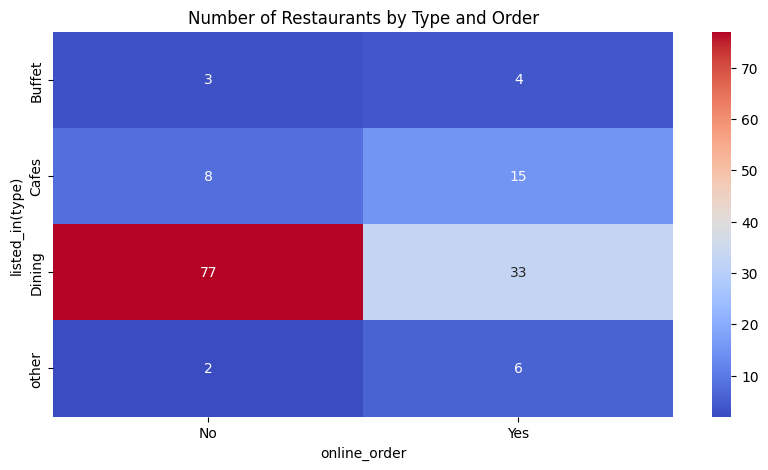

In [33]:
#2. Use a heatmap to visualize this data.
plt.figure(figsize=(10,5))
plt.title('Number of Restaurants by Type and Order')
sns.heatmap(pivot_table,annot=True,cmap='coolwarm',fmt='d')
plt.show()

#Conclusion: Note the preference of online orders for cafes and offline orders for dining restaurants.